# <b>ENGR 418 Project Stage 1</b>

<b>Group 7 <br>
Group Members:</b> <br>
Alif Aiman Ahmad Zukiman | 35338490 <br>
Anas Chellabi | 86925930

_October 30, 2023_

## Problem Description
We are to classify a Lego dataset into four different classes: 2x4 rectangles, 2x2 squares, 2x2 circles, and 2x1 rectangles. The classified Legos are then sorted according to their predicted classes. This will be done via the multi-class classification algorithm, as presented below.

### 1. Extracting Data

Import necessary libraries:

In [23]:
import os                                                       # for recognising path directories
import numpy as np  
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression             # algorithm to be used
from sklearn.metrics import confusion_matrix, accuracy_score    # accuracy testing
from PIL import Image                                           # image processor
import random                                        

User-defined Paths:

In [8]:
# dataset file path for Alif
training_path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\training\\" 
testing_path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\testing\\"

# dataset file path for Anas
# training_path = "e:\\418 dataset\\Lego_dataset_1\\training\\" 
# testing_path = "e:\\418 dataset\\Lego_dataset_1\\testing\\"

Assign arrays of training and testing by redirecting the arrays to the specified paths:

In [85]:
n_classes = 4   # no. of classes

# create empty lists for four classes
folder_training = []
folder_testing = []


# detect how many files we have per class
# class 0:"2b1", class 1:"cir", class 2:"rec", class 3:"squ"
classes = [i for i in range(n_classes)]
class_type = ["2b1", "cir", "rec", "squ"]


for i in range(len(class_type)):

    class_temp = [] # list to temporarily store class in consideration

    # run through the entire training dataset and detect if it is of the same type as
    # one we are considering. if true, then put into class_temp
    for j in os.listdir(training_path):
        if class_type[i] in j:
            class_temp.append(j)
    
    folder_training.append(class_temp)

for i in range(len(folder_training)):
    for j in range(len(folder_training[i])):
        folder_elem = folder_training[i][j]
        folder_training[i][j] = training_path + folder_elem

        
for i in range(len(class_type)):

    class_temp = [] # list to temporarily store class in consideration

    # run through the entire training dataset and detect if it is of the same type as
    # one we are considering. if true, then put into class_temp
    for j in os.listdir(testing_path):
        if class_type[i] in j:
            class_temp.append(j)
            
    folder_testing.append(class_temp)

for i in range(len(folder_testing)):
     for j in range(len(folder_testing[i])):
         folder_elem = folder_testing[i][j]
         folder_testing[i][j] = testing_path + folder_elem

# print(folder_testing)
# print(folder_training)


Define a function "get_data" to retrieve information about the chosen images:

In [60]:
def get_data(folder, im_width, label, n_samples):

    # x,y coordinates for storing the image pixels
    x = np.empty((n_samples, im_width**2))
    y = np.empty((n_samples, 1))

    # extract image information into x,y
    for i in range(n_samples):
        path = folder[i]
        im = Image.open(path).convert('L')  # open image and convert to grayscale
        im = im.resize((im_width,im_width)) # resize to pixel size desired
        im_array = asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]

    return x,y

### 2. Parameter Initialization and Training Data Preparation

In [61]:
im_width = 64   # pixel size to be considered
P_per_class = [len(folder_training[i]) for i in range(n_classes)]
x_train = np.empty((sum(P_per_class), im_width**2))
y_train = np.empty((sum(P_per_class), 1))

for i in range(n_classes):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class[i])
    x_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = x_i
    y_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = y_i

print(x_train.shape, y_train.shape)


(144, 4096) (144, 1)


Check to see if the get_data function was working properly:

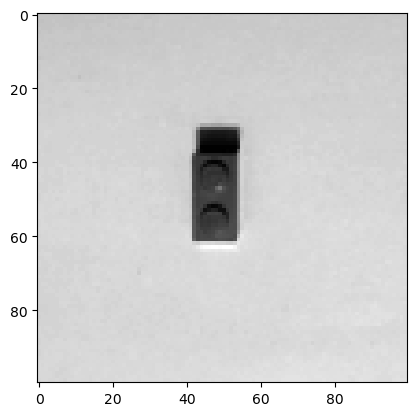

In [100]:
i_check = random.randrange(n_classes)
j_check = random.randrange(P_per_class[i_check])
res_check = 100

x_check, y_check = get_data(folder_training[i_check], res_check, i_check, P_per_class[i_check])
plt.imshow(x_check[j_check,:].reshape(res_check,res_check), cmap = 'gray')
plt.show()

### 3. Model Training

In [83]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=1000)

### 4. Model Testing

Prepare data for testing:

In [81]:
P_per_class = [len(folder_testing[i]) for i in range(n_classes)]
x_test = np.empty((sum(P_per_class), im_width**2))
y_test = np.empty((sum(P_per_class), 1))


for i in range(n_classes):
    x_i, y_i = get_data(folder_testing[i], im_width, i, P_per_class[i])
    x_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = x_i
    y_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = y_i

print(x_test.shape,y_test.shape)


(72, 4096) (72, 1)


Test model and print the corresponding accuracy and confusion matrix:

In [84]:
y_pred = model.predict(x_test)

# displays the accuracy score and confusion matrix for the testing data
print(f"Accuracy score: {accuracy_score(y_test,y_pred):.3f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy score: 0.931
Confusion matrix: 
[[18  0  0  0]
 [ 0 16  0  2]
 [ 0  0 16  2]
 [ 0  1  0 17]]


Define function "test_function":

In [101]:
# insert ur code here